In [1]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [50]:
heart_disease = Table.read_table('heart_2020_cleaned.csv')
heart_disease.show(2)

HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
No,16.6,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No


# Find number of people who said Yes and No to Heart Disease

In [18]:
hbar = heart_disease.group("HeartDisease")
hbar

HeartDisease,count
No,292422
Yes,27373


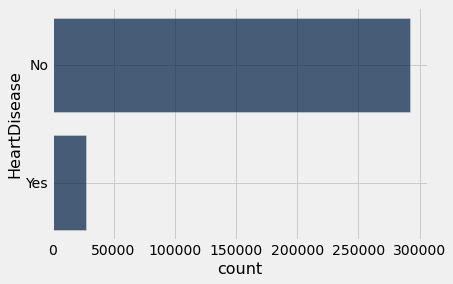

In [4]:
hbar.barh("HeartDisease")

# BMI Column Analysis

#### Bar chart to show the difference in BMI average of the two groups

In [39]:
hd_and_bmi = heart_disease.select('HeartDisease', 'BMI')
bmi_average = hd_and_bmi.group('HeartDisease', np.average)
bmi_average

HeartDisease,BMI average
No,28.2247
Yes,29.4016


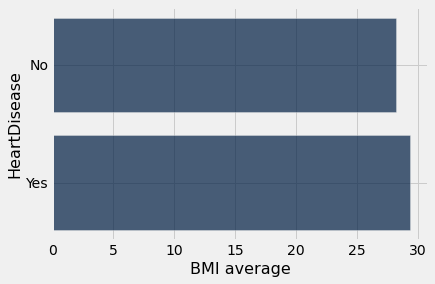

In [40]:
bmi_average.barh("HeartDisease")

#### Created a new table with added column that stored True or False depending on whether or not the BMI was above 28 which was the average of the No Heart Disease group. Then found the average of the two groups

In [46]:
bmi_binary = hd_and_bmi.with_column("BMI_Above_28",hd_and_bmi["BMI"] > 28)
bmi_binary_avg = bmi_binary.select("HeartDisease", "BMI_Above_28").group("HeartDisease", np.average)
bmi_binary_avg

HeartDisease,BMI_Above_28 average
No,0.441352
Yes,0.527454


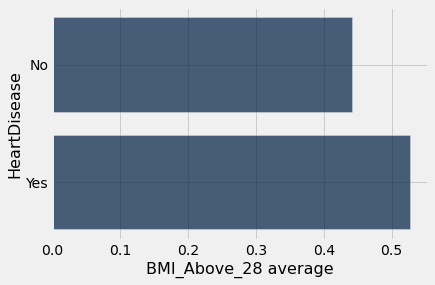

In [47]:
bmi_binary_avg.barh("HeartDisease")

#### Function returns difference of means between two groups (In this case it would be Yes HeartDisease and No HeartDisease)

In [3]:
def difference_of_means(table, label, group_label):
    """Takes: name of table, column label of numerical variable,
    column label of group-label variable
    Returns: Difference of means of the two groups"""
    
    #table with the two relevant columns
    reduced = table.select(label, group_label)  
    
    # table containing group means
    means_table = reduced.group(group_label, np.average)
    # array of group means
    means = means_table.column(1)
    
    return means.item(1) - means.item(0)

#### This function creates a table with shuffled column, then returns the difference of means of the two groups in the shuffled column (In this case it would be between Yes and No heart disease groups)

In [4]:
def one_simulated_difference(table, label, group_label):
    """Takes: name of table, column label of numerical variable,
    column label of group-label variable
    Returns: Difference of means of the two groups after shuffling labels"""
    
    # array of shuffled labels
    # with_replacement = False does NOT have duplicates
    shuffled_labels = table.sample(with_replacement = False
                                                    ).column(group_label)
    
    # table of numerical variable and shuffled labels
    shuffled_table = table.select(label).with_column(
        'Shuffled Label', shuffled_labels)
    
    return difference_of_means(shuffled_table, label, 'Shuffled Label') 

# BMI Column Permutation Test

#### Table to remove any unncessary columns that won't be tested to decrease run-time 

In [9]:
bmi_heart_table = heart_disease.select("BMI", "HeartDisease")

#### Difference of means between Yes HeartDisease and No HeartDisease in non-shuffled column

In [17]:
bmi_observed_difference = difference_of_means(bmi_heart_table,'BMI',"HeartDisease")
bmi_observed_difference

1.1769337435465594

#### Simulation that appends the difference of means of the simulated column to an array

In [11]:
differences_bmi = make_array()

for i in np.arange(100):
    new_difference = one_simulated_difference(bmi_heart_table,'BMI', 'HeartDisease')
    differences_bmi = np.append(differences_bmi, new_difference)

BMI Observed Difference: 1.1769337435465594


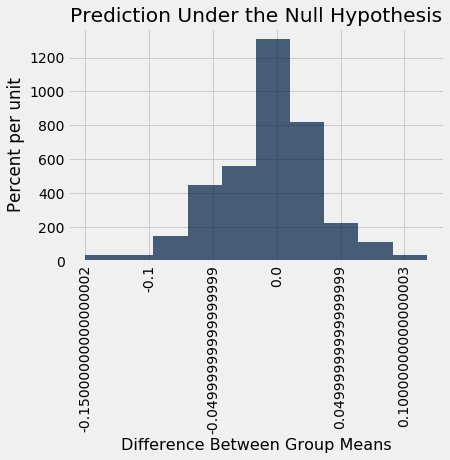

In [19]:
Table().with_column('Difference Between Group Means', differences_bmi).hist()
print('BMI Observed Difference:', bmi_observed_difference)
plots.title('Prediction Under the Null Hypothesis');

#### Since the observed value is not in this simulation, this tells me that the p-value is very small. There is a correlation between BMI and heart disease. 

# Physical and Mental Health Analysis

#### These two columns represents the number of days the individual had a mental health day or the number of days their physical health was not good the past 30 days

In [37]:
physical_mental = heart_disease.select("HeartDisease", "PhysicalHealth", "MentalHealth")
pm_average = physical_mental.group("HeartDisease", np.average)
pm_average

HeartDisease,PhysicalHealth average,MentalHealth average
No,2.95642,3.82878
Yes,7.80824,4.64176


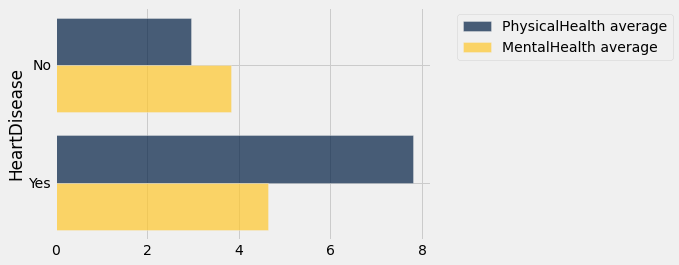

In [38]:
pm_average.barh("HeartDisease")

# Physical Health Pivot Table Analysis

In [148]:
physicalHealth_pivot = heart_disease.pivot("HeartDisease", "PhysicalHealth")

In [146]:
physicalHealth_pivot

PhysicalHealth,No,Yes
0,212167,14422
1,9884,605
2,13711,1169
3,7774,843
4,3974,494
5,6710,896
6,1097,173
7,4164,465
8,804,120
9,143,37


In [149]:
physicalHealth_percent = physicalHealth_pivot.with_column("Percentage to get Heart Disease", 
                                      physicalHealth_pivot["Yes"] / (physicalHealth_pivot["Yes"] +
                                                                     physicalHealth_pivot["No"]))

In [158]:
physicalHealth_percent.sort("Yes", descending=True)

PhysicalHealth,No,Yes,Percentage to get Heart Disease
0,212167,14422,0.0636483
30,14890,4619,0.236763
2,13711,1169,0.0785618
15,4082,930,0.185555
5,6710,896,0.117802
3,7774,843,0.0978299
10,4615,838,0.153677
20,2575,641,0.199316
1,9884,605,0.0576795
4,3974,494,0.110564


#### Scatter plot to show relationship, seems to be a clear linear progression

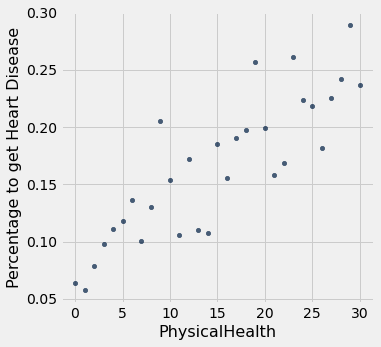

In [163]:
physicalHealth_percent.select("PhysicalHealth", 
                              "Percentage to get Heart Disease").scatter("PhysicalHealth")

# Mental Health Pivot Table Analysis

In [164]:
mentalHealth_pivot = heart_disease.pivot("HeartDisease", "MentalHealth")

In [165]:
mentalHealth_pivot

MentalHealth,No,Yes
0,187186,18215
1,8678,613
2,15454,1041
3,9808,658
4,5056,323
5,13267,882
6,1398,112
7,5210,318
8,1023,71
9,184,19


In [166]:
mentalHealth_percent = mentalHealth_pivot.with_column("Percentage to get Heart Disease", 
                                      mentalHealth_pivot["Yes"] / (mentalHealth_pivot["Yes"] +
                                                                   mentalHealth_pivot["No"]))

In [167]:
mentalHealth_percent

MentalHealth,No,Yes,Percentage to get Heart Disease
0,187186,18215,0.0886802
1,8678,613,0.0659778
2,15454,1041,0.06311
3,9808,658,0.0628702
4,5056,323,0.0600483
5,13267,882,0.0623366
6,1398,112,0.0741722
7,5210,318,0.0575253
8,1023,71,0.0648995
9,184,19,0.0935961


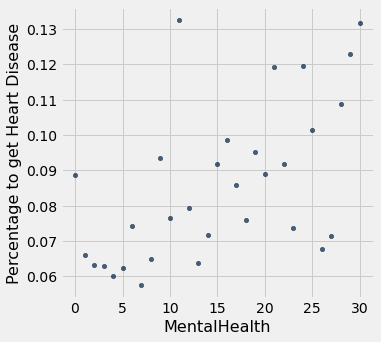

In [168]:
mentalHealth_percent.select("MentalHealth", "Percentage to get Heart Disease").scatter("MentalHealth")

# Permutation Test for Physical Health

In [24]:
ph_observed_difference = difference_of_means(physical_mental,'PhysicalHealth',"HeartDisease")
ph_observed_difference

4.851825970068795

In [25]:
ph_differences = make_array()

for i in np.arange(100):
    new_difference = one_simulated_difference(physical_mental,'PhysicalHealth', 'HeartDisease')
    ph_differences = np.append(ph_differences, new_difference)

Physical Health Observed Difference: 4.851825970068795


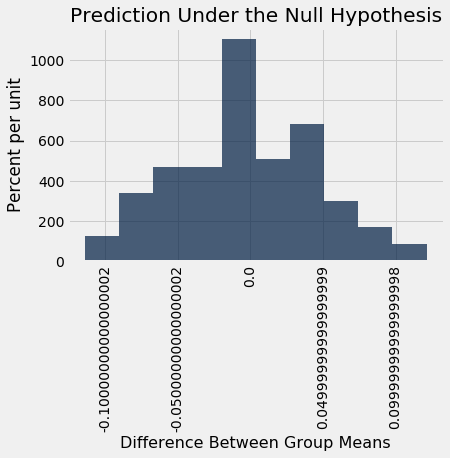

In [27]:
Table().with_column('Difference Between Group Means', ph_differences).hist()
print('Physical Health Observed Difference:', ph_observed_difference)
plots.title('Prediction Under the Null Hypothesis');

# Permutation Test for Mental Health

In [38]:
mental_observed_difference = difference_of_means(physical_mental,'MentalHealth',"HeartDisease")
mental_observed_difference

0.8129855093322123

In [33]:
mental_differences = make_array()

for i in np.arange(100):
    new_difference = one_simulated_difference(physical_mental,'MentalHealth', 'HeartDisease')
    mental_differences = np.append(mental_differences, new_difference)

Mental Health Observed Difference: 0.8129855093322123


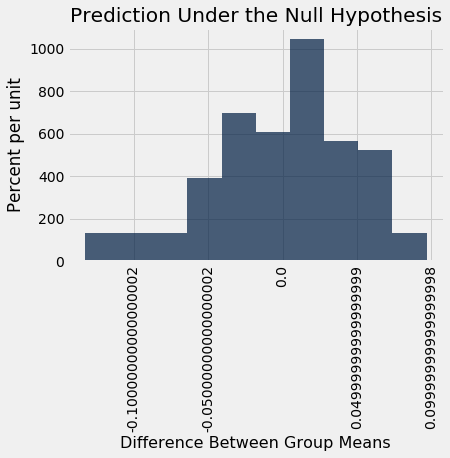

In [41]:
Table().with_column('Difference Between Group Means', mental_differences).hist()
print('Mental Health Observed Difference:', mental_observed_difference)
plots.title('Prediction Under the Null Hypothesis');

# Smoking Column Analysis

#### First created a new table that only selected the heart disease, smoking, and alcohol drinking columns for further analysis. This table will also be used in the functions below to determine the sum of people who said yes or no to heart disease

In [57]:
smoking_drinking = heart_disease.select("HeartDisease", "Smoking","AlcoholDrinking" )

#### Created a new table with an added column to store binary values of true and false. Allowing me to find the np.average of a column that contained categorical values

In [58]:
smoking_binary = smoking_drinking.with_column("Percentage of Smokers", smoking_drinking['Smoking'] == 'Yes')
smoking_binary.select("Percentage of Smokers", "HeartDisease").group("HeartDisease", np.average)

HeartDisease,Percentage of Smokers average
No,0.396246
Yes,0.585869


#### Bar chart to show the percentage of people who smoke in both No and Yes heart disease groups

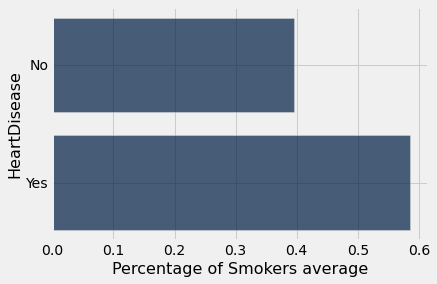

In [59]:
smoking_binary.select("Percentage of Smokers", "HeartDisease").group("HeartDisease", np.average).barh("HeartDisease")

# Smoking Pivot Table Analysis

In [30]:
smoke_pivot = heart_disease.pivot("HeartDisease", "Smoking")

#### Yes and no stands for Yes heart Disease and No heart disease

In [31]:
smoke_pivot

Smoking,No,Yes
No,176551,11336
Yes,115871,16037


In [32]:
smoke_percent = smoke_pivot.with_column("Percentage to get Heart Disease", 
                                      smoke_pivot["Yes"] / (smoke_pivot["Yes"] + smoke_pivot["No"]))

#### Find percentage of getting heart disease if you smoke

In [33]:
smoke_percent

Smoking,No,Yes,Percentage to get Heart Disease
No,176551,11336,0.0603341
Yes,115871,16037,0.121577


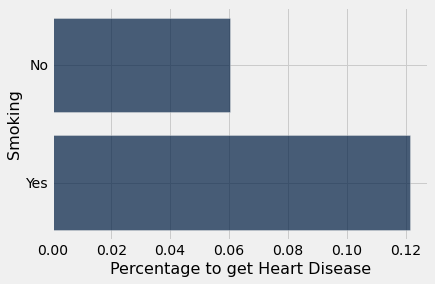

In [34]:
smoke_percent.select("Smoking", "Percentage to get Heart Disease").barh("Smoking")

# Smoking Column Permutation Test

In [51]:
smoking_observed_difference = difference_of_means(smoking_binary,'Smoker_Yes',"HeartDisease")
smoking_observed_difference

0.1896234507572933

In [46]:
smoking_differences = make_array()

for i in np.arange(100):
    new_difference = one_simulated_difference(smoking_binary,'Smoker_Yes', 'HeartDisease')
    smoking_differences = np.append(smoking_differences, new_difference)

Smoking Observed Difference: 0.1896234507572933


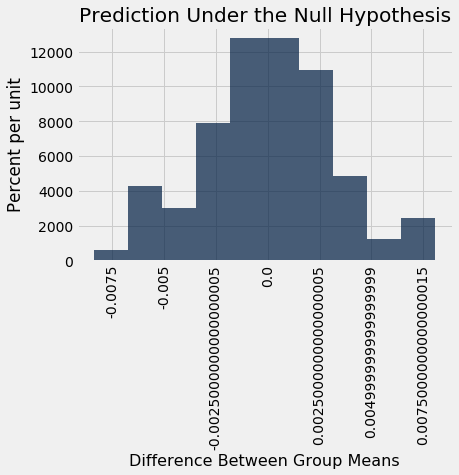

In [48]:
Table().with_column('Difference Between Group Means', smoking_differences).hist()
print('Smoking Observed Difference:', smoking_observed_difference)
plots.title('Prediction Under the Null Hypothesis');

# Drinking Column Analysis

In [72]:
drinking_binary = smoking_drinking.with_column("Percentage of Drinkers", smoking_drinking['AlcoholDrinking'] == 'Yes')
drinking_binary.select("Percentage of Drinkers", "HeartDisease").group("HeartDisease", np.average)

HeartDisease,Percentage of Drinkers average
No,0.0705692
Yes,0.0416834


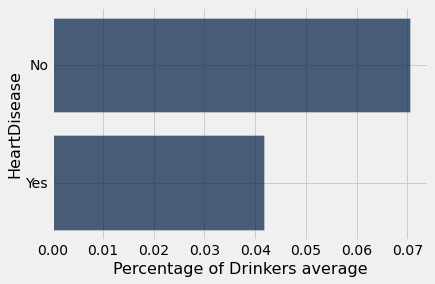

In [73]:
drinking_binary.select("Percentage of Drinkers", "HeartDisease").group("HeartDisease", np.average).barh("HeartDisease")

# Drinking Pivot Table Analysis

In [60]:
drink_pivot = heart_disease.pivot("HeartDisease", "AlcoholDrinking")

In [61]:
drink_pivot

AlcoholDrinking,No,Yes
No,271786,26232
Yes,20636,1141


In [62]:
drink_percent = drink_pivot.with_column("Percentage to get Heart Disease", 
                                      drink_pivot["Yes"] / (drink_pivot["Yes"] + drink_pivot["No"]))

In [63]:
drink_percent

AlcoholDrinking,No,Yes,Percentage to get Heart Disease
No,271786,26232,0.0880215
Yes,20636,1141,0.0523947


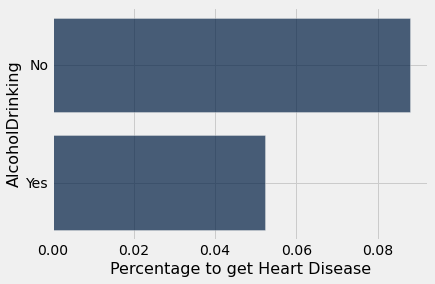

In [65]:
drink_percent.select("AlcoholDrinking", "Percentage to get Heart Disease").barh("AlcoholDrinking")

# Drinking Column Permutation Test

In [54]:
drinking_observed_difference = difference_of_means(drinking_binary,'Drinking_Yes',"HeartDisease")
drinking_observed_difference

-0.028885835155838722

In [55]:
drinking_differences = make_array()

for i in np.arange(100):
    new_difference = one_simulated_difference(drinking_binary,'Drinking_Yes', 'HeartDisease')
    drinking_differences = np.append(drinking_differences, new_difference)

Drinking Observed Difference: -0.028885835155838722


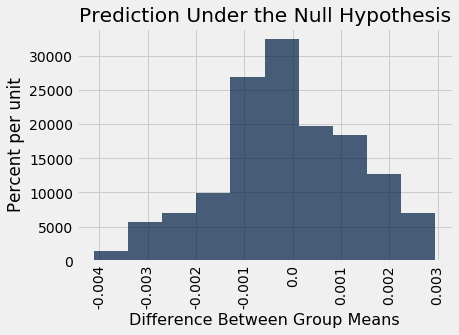

In [56]:
Table().with_column('Difference Between Group Means', drinking_differences).hist()
print('Drinking Observed Difference:', drinking_observed_difference)
plots.title('Prediction Under the Null Hypothesis');

# Difficulty Walking Column Analysis

In [57]:
stroke_walking = heart_disease.select("HeartDisease", "DiffWalking", "Stroke")

In [58]:
walking_binary = stroke_walking.with_column("Difficulty_Walking", stroke_walking['DiffWalking'] == 'Yes')
walking_binary.select("Difficulty_Walking", "HeartDisease").group("HeartDisease", np.average)

HeartDisease,Difficulty_Walking average
No,0.117577
Yes,0.366346


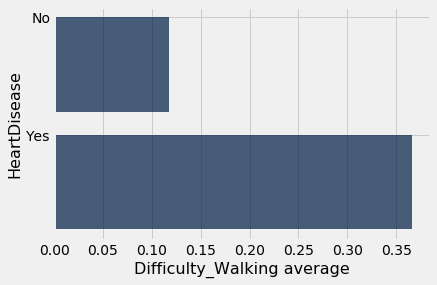

In [59]:
walking_binary.select("Difficulty_Walking", "HeartDisease").group("HeartDisease", np.average).barh("HeartDisease")

# Difficulty Walking Pivot Table Analysis

In [67]:
diffWalking_pivot = heart_disease.pivot("HeartDisease", "DiffWalking")

In [68]:
diffWalking_pivot

DiffWalking,No,Yes
No,258040,17345
Yes,34382,10028


In [69]:
diffWalking_percent = diffWalking_pivot.with_column("Percentage to get Heart Disease", 
                                      diffWalking_pivot["Yes"] / (diffWalking_pivot["Yes"] + diffWalking_pivot["No"]))

In [70]:
diffWalking_percent

DiffWalking,No,Yes,Percentage to get Heart Disease
No,258040,17345,0.0629845
Yes,34382,10028,0.225805


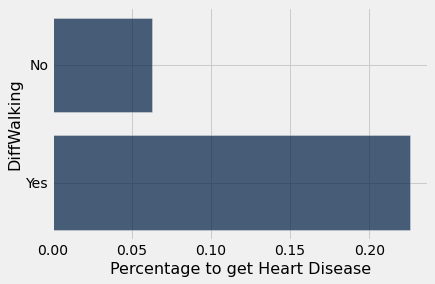

In [71]:
diffWalking_percent.select("DiffWalking", "Percentage to get Heart Disease").barh("DiffWalking")

# Difficulty Walking Column Permutation Test

In [60]:
diffWalk_observed_difference = difference_of_means(walking_binary,'Difficulty_Walking',"HeartDisease")
diffWalk_observed_difference

0.2487697468175561

In [61]:
diffWalk_differences = make_array()

for i in np.arange(100):
    new_difference = one_simulated_difference(walking_binary,'Difficulty_Walking', 'HeartDisease')
    diffWalk_differences = np.append(diffWalk_differences, new_difference)

Difficulty Walking Observed Difference: 0.2487697468175561


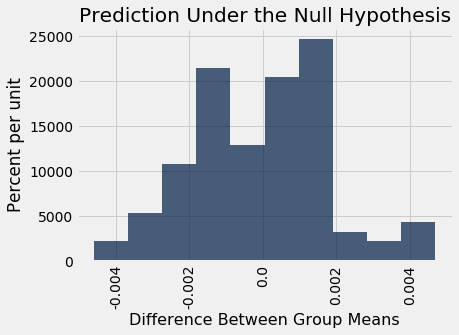

In [62]:
Table().with_column('Difference Between Group Means', diffWalk_differences).hist()
print('Difficulty Walking Observed Difference:', diffWalk_observed_difference)
plots.title('Prediction Under the Null Hypothesis');

# Stroke Column Analysis

In [63]:
stroke_binary = stroke_walking.with_column("Stroke_Yes", stroke_walking['Stroke'] == 'Yes')
stroke_binary.select("Stroke_Yes", "HeartDisease").group("HeartDisease", np.average)

HeartDisease,Stroke_Yes average
No,0.0262634
Yes,0.16034


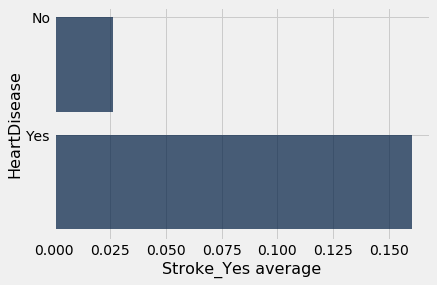

In [64]:
stroke_binary.select("Stroke_Yes", "HeartDisease").group("HeartDisease", np.average).barh("HeartDisease")

# Stroke Pivot Table Analysis

In [74]:
stroke_pivot = heart_disease.pivot("HeartDisease", "Stroke")

In [75]:
stroke_pivot

Stroke,No,Yes
No,284742,22984
Yes,7680,4389


In [76]:
stroke_percent = stroke_pivot.with_column("Percentage to get Heart Disease", 
                                      stroke_pivot["Yes"] / (stroke_pivot["Yes"] + stroke_pivot["No"]))

In [77]:
stroke_percent

Stroke,No,Yes,Percentage to get Heart Disease
No,284742,22984,0.0746898
Yes,7680,4389,0.363659


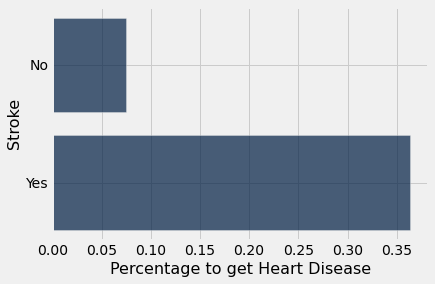

In [78]:
stroke_percent.select("Stroke", "Percentage to get Heart Disease").barh("Stroke")

# Stroke Column Permutation Test

In [65]:
stroke_observed_difference = difference_of_means(stroke_binary,'Stroke_Yes',"HeartDisease")
stroke_observed_difference

0.13407706766293254

In [66]:
stroke_differences = make_array()

for i in np.arange(100):
    new_difference = one_simulated_difference(stroke_binary,'Stroke_Yes', 'HeartDisease')
    stroke_differences = np.append(stroke_differences, new_difference)

Stroke Observed Difference: 0.13407706766293254


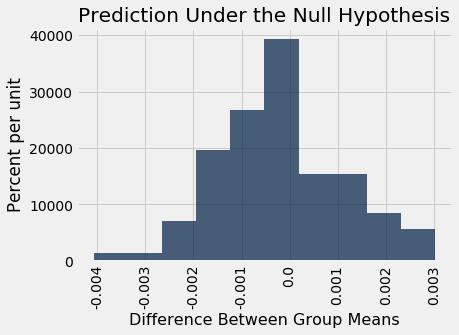

In [67]:
Table().with_column('Difference Between Group Means', stroke_differences).hist()
print('Stroke Observed Difference:', stroke_observed_difference)
plots.title('Prediction Under the Null Hypothesis');

# Diabetic Column Analysis

#### Create a table that has heart disease, diabetic, and asthma columns

In [68]:
diabetic_asthma = heart_disease.select("HeartDisease", "Diabetic", "Asthma")

In [69]:
diabetic_binary = diabetic_asthma.with_column("Diabetic", diabetic_asthma['Diabetic'] == 'Yes')
diabetic_binary.select("Diabetic", "HeartDisease").group("HeartDisease", np.average)

HeartDisease,Diabetic average
No,0.108901
Yes,0.32722


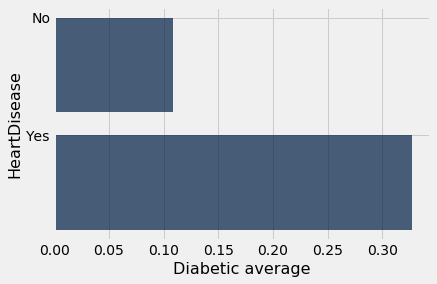

In [79]:
diabetic_binary.select("Diabetic", "HeartDisease").group("HeartDisease", np.average).barh("HeartDisease")

# Diabetic Pivot Table Analysis

In [81]:
diabetic_pivot = heart_disease.pivot("HeartDisease", "Diabetic")

In [82]:
diabetic_pivot

Diabetic,No,Yes
No,258126,18308
Yes,31845,8957
Yes (during pregnancy),2451,108


In [83]:
diabetic_percent = diabetic_pivot.with_column("Percentage to get Heart Disease", 
                                      diabetic_pivot["Yes"] / (diabetic_pivot["Yes"] + diabetic_pivot["No"]))

In [84]:
diabetic_percent

Diabetic,No,Yes,Percentage to get Heart Disease
No,258126,18308,0.0662292
Yes,31845,8957,0.219524
Yes (during pregnancy),2451,108,0.042204


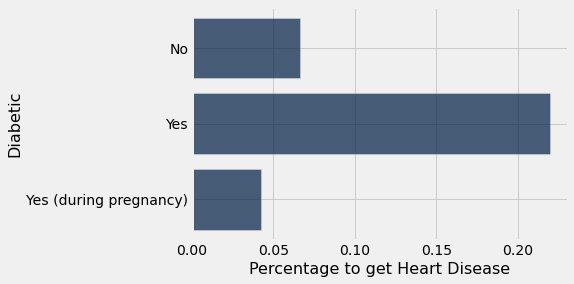

In [85]:
diabetic_percent.select("Diabetic", "Percentage to get Heart Disease").barh("Diabetic")

# Diabetic Column Permutation Test

In [71]:
diabetic_observed_difference = difference_of_means(diabetic_binary,'Diabetic',"HeartDisease")
diabetic_observed_difference

0.21831941844001806

In [73]:
diabetic_differences = make_array()

for i in np.arange(100):
    new_difference = one_simulated_difference(diabetic_binary,'Diabetic', 'HeartDisease')
    diabetic_differences = np.append(diabetic_differences, new_difference)

Diabetic Observed Difference: 0.21831941844001806


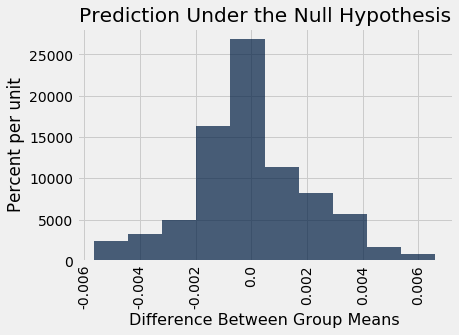

In [74]:
Table().with_column('Difference Between Group Means', diabetic_differences).hist()
print('Diabetic Observed Difference:', diabetic_observed_difference)
plots.title('Prediction Under the Null Hypothesis');

# Asthma Column Analysis

In [75]:
asthma_binary = diabetic_asthma.with_column("Asthma", diabetic_asthma['Asthma'] == 'Yes')
asthma_binary.select("Asthma", "HeartDisease").group("HeartDisease", np.average)

HeartDisease,Asthma average
No,0.129741
Yes,0.180214


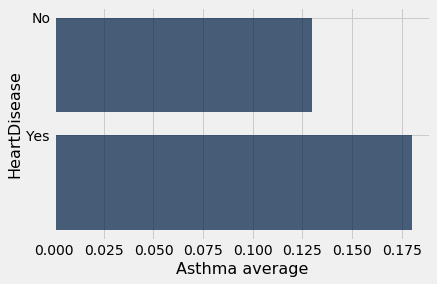

In [80]:
asthma_binary.select("Asthma", "HeartDisease").group("HeartDisease", np.average).barh("HeartDisease")

# Asthma Pivot Table Analysis

In [86]:
asthma_pivot = heart_disease.pivot("HeartDisease", "Asthma")

In [87]:
asthma_pivot

Asthma,No,Yes
No,254483,22440
Yes,37939,4933


In [88]:
asthma_percent = asthma_pivot.with_column("Percentage to get Heart Disease", 
                                      asthma_pivot["Yes"] / (asthma_pivot["Yes"] + asthma_pivot["No"]))

In [89]:
asthma_percent

Asthma,No,Yes,Percentage to get Heart Disease
No,254483,22440,0.0810334
Yes,37939,4933,0.115063


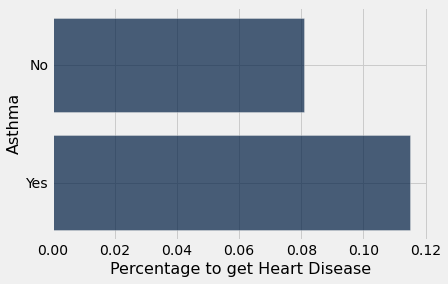

In [90]:
asthma_percent.select("Asthma", "Percentage to get Heart Disease").barh("Asthma")

# Asthma Column Permutation Test

In [76]:
asthma_observed_difference = difference_of_means(asthma_binary,'Asthma',"HeartDisease")
asthma_observed_difference

0.05047349917336896

In [77]:
asthma_differences = make_array()

for i in np.arange(100):
    new_difference = one_simulated_difference(asthma_binary,'Asthma', 'HeartDisease')
    asthma_differences = np.append(asthma_differences, new_difference)

Asthma Observed Difference: 0.05047349917336896


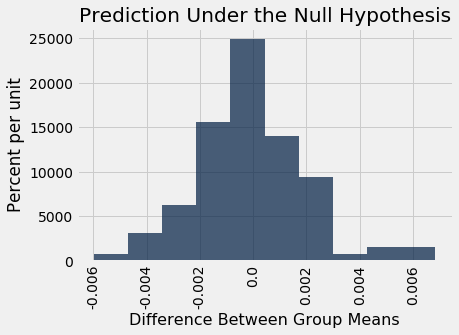

In [78]:
Table().with_column('Difference Between Group Means', asthma_differences).hist()
print('Asthma Observed Difference:', asthma_observed_difference)
plots.title('Prediction Under the Null Hypothesis');

# Kidney Disease Column Analysis

#### Create a table that selects columns: heart disease, kidney disease, and skin cancer

In [82]:
kidney_skin = heart_disease.select("HeartDisease", "KidneyDisease", "SkinCancer")

In [83]:
kidney_binary = kidney_skin.with_column("Kidney_Disease", kidney_skin['KidneyDisease'] == 'Yes')
kidney_binary.select("Kidney_Disease", "HeartDisease").group("HeartDisease", np.average)

HeartDisease,Kidney_Disease average
No,0.0284657
Yes,0.126219


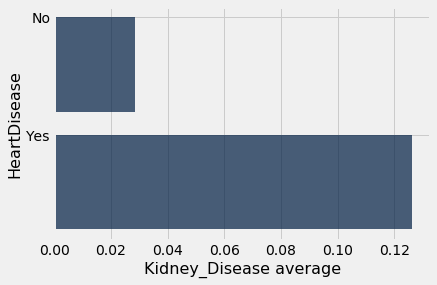

In [87]:
kidney_binary.select("Kidney_Disease", "HeartDisease").group("HeartDisease", np.average).barh("HeartDisease")

# Kidney Disease Pivot Table Analysis

In [92]:
kidney_pivot = heart_disease.pivot("HeartDisease", "KidneyDisease")

In [93]:
kidney_pivot

KidneyDisease,No,Yes
No,284098,23918
Yes,8324,3455


In [94]:
kidney_percent = kidney_pivot.with_column("Percentage to get Heart Disease", 
                                      kidney_pivot["Yes"] / (kidney_pivot["Yes"] + kidney_pivot["No"]))

In [95]:
kidney_percent

KidneyDisease,No,Yes,Percentage to get Heart Disease
No,284098,23918,0.0776518
Yes,8324,3455,0.293319


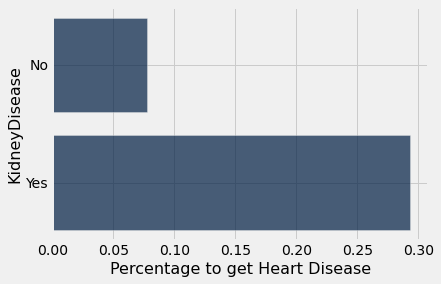

In [97]:
kidney_percent.select("KidneyDisease", "Percentage to get Heart Disease").barh("KidneyDisease")

# Kidney Disease Column Permutation Test

In [84]:
kidney_observed_difference = difference_of_means(kidney_binary,'Kidney_Disease',"HeartDisease")
kidney_observed_difference

0.09775355664681433

In [85]:
kidney_differences = make_array()

for i in np.arange(100):
    new_difference = one_simulated_difference(kidney_binary,'Kidney_Disease', 'HeartDisease')
    kidney_differences = np.append(kidney_differences, new_difference)

Kidney Disease Observed Difference: 0.09775355664681433


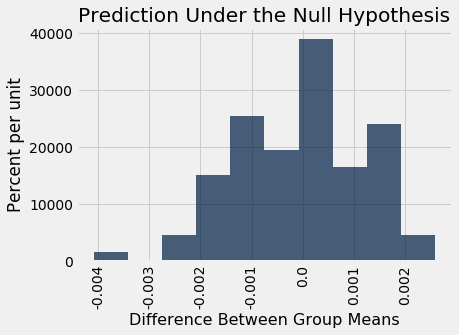

In [86]:
Table().with_column('Difference Between Group Means', kidney_differences).hist()
print('Kidney Disease Observed Difference:', kidney_observed_difference)
plots.title('Prediction Under the Null Hypothesis');

# Skin Cancer Column Analysis

In [89]:
skin_binary = kidney_skin.with_column("Skin_Cancer", kidney_skin['SkinCancer'] == 'Yes')
skin_binary.select("Skin_Cancer", "HeartDisease").group("HeartDisease", np.average)

HeartDisease,Skin_Cancer average
No,0.0849423
Yes,0.181931


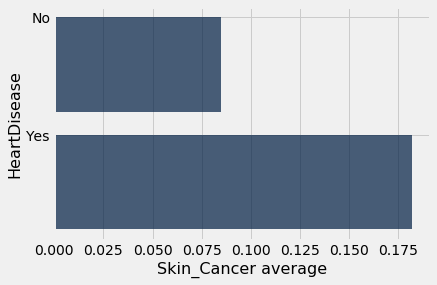

In [90]:
skin_binary.select("Skin_Cancer", "HeartDisease").group("HeartDisease", np.average).barh("HeartDisease")

# Skin Cancer Pivot Table Analysis

In [98]:
skin_pivot = heart_disease.pivot("HeartDisease", "SkinCancer")

In [99]:
skin_pivot

SkinCancer,No,Yes
No,267583,22393
Yes,24839,4980


In [100]:
skin_percent = skin_pivot.with_column("Percentage to get Heart Disease", 
                                      skin_pivot["Yes"] / (skin_pivot["Yes"] + skin_pivot["No"]))

In [101]:
skin_percent

SkinCancer,No,Yes,Percentage to get Heart Disease
No,267583,22393,0.0772236
Yes,24839,4980,0.167008


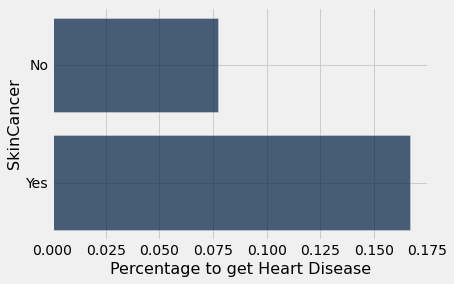

In [103]:
skin_percent.select("SkinCancer", "Percentage to get Heart Disease").barh("SkinCancer")

# Skin Cancer Column Permutation Test

In [91]:
skin_observed_difference = difference_of_means(skin_binary,'Skin_Cancer',"HeartDisease")
skin_observed_difference

0.09698879058687494

In [92]:
skin_differences = make_array()

for i in np.arange(100):
    new_difference = one_simulated_difference(skin_binary,'Skin_Cancer', 'HeartDisease')
    skin_differences = np.append(skin_differences, new_difference)

Skin Cancer Observed Difference: 0.09698879058687494


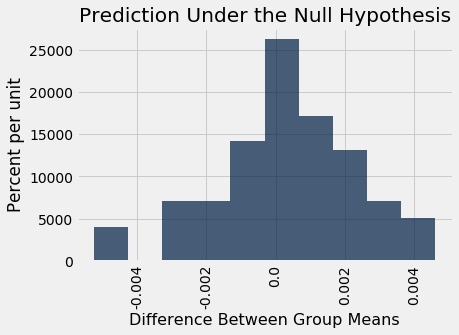

In [93]:
Table().with_column('Difference Between Group Means', skin_differences).hist()
print('Skin Cancer Observed Difference:', skin_observed_difference)
plots.title('Prediction Under the Null Hypothesis');

# Physical Activity Column Analysis

#### Create a table that has the physical activity and heart disease column

In [99]:
physical_activity = heart_disease.select("HeartDisease", "PhysicalActivity")

In [137]:
physical_binary = physical_activity.with_column("Physical_No", physical_activity['PhysicalActivity'] == 'No')
physical_binary.select("Physical_No", "HeartDisease").group("HeartDisease", np.average)

HeartDisease,Physical_No average
No,0.211865
Yes,0.361086


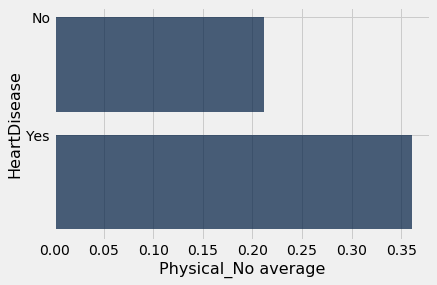

In [111]:
physical_binary.select("Physical_No", "HeartDisease").group("HeartDisease", np.average).barh("HeartDisease")

# Physical Activity Pivot Table Analysis

In [105]:
physical_pivot = heart_disease.pivot("HeartDisease", "PhysicalActivity")

In [106]:
physical_pivot

PhysicalActivity,No,Yes
No,61954,9884
Yes,230468,17489


In [107]:
physical_percent = physical_pivot.with_column("Percentage to get Heart Disease", 
                                      physical_pivot["Yes"] / (physical_pivot["Yes"] + physical_pivot["No"]))

In [108]:
physical_percent

PhysicalActivity,No,Yes,Percentage to get Heart Disease
No,61954,9884,0.137587
Yes,230468,17489,0.0705324


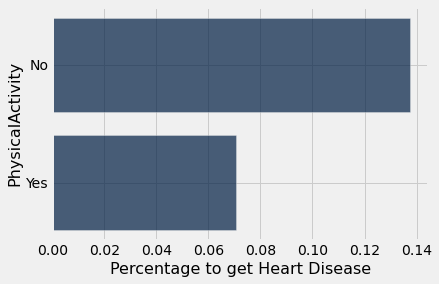

In [109]:
physical_percent.select("PhysicalActivity", "Percentage to get Heart Disease").barh("PhysicalActivity")

# Physical Activity Column Permutation Test

In [128]:
physical_observed_difference = difference_of_means(physical_binary,'Physical_No',"HeartDisease")
physical_observed_difference

0.14922069707032298

In [156]:
physical_differences = make_array()

for i in np.arange(100):
    new_difference = one_simulated_difference(physical_binary,'Physical_No', 'HeartDisease')
    physical_differences = np.append(physical_differences, new_difference)

No Physical Activity Observed Difference: 0.14922069707032298


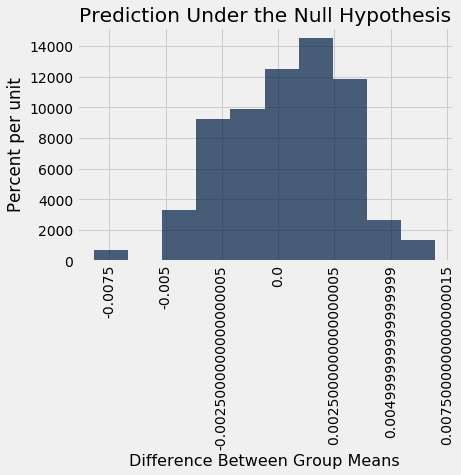

In [157]:
Table().with_column('Difference Between Group Means', physical_differences).hist()
print('No Physical Activity Observed Difference:', physical_observed_difference)
plots.title('Prediction Under the Null Hypothesis');

# Sex Column Analysis

In [80]:
sex_column = heart_disease.select("HeartDisease", "Sex")

In [81]:
sex_binary = sex_column.with_column("Female", sex_column['Sex'] == 'Female')
sex_binary.select("Female", "HeartDisease").group("HeartDisease", np.average)

HeartDisease,Female average
No,0.535428
Yes,0.410404


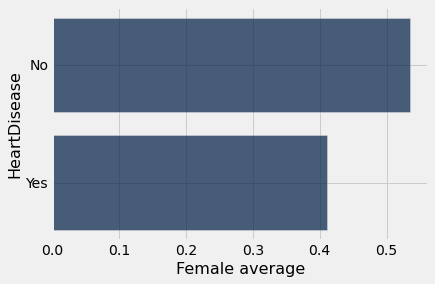

In [82]:
sex_binary.select("Female", "HeartDisease").group("HeartDisease", np.average).barh("HeartDisease")

# Sex Pivot Table Analysis

In [110]:
sex_pivot = heart_disease.pivot("HeartDisease", "Sex")

In [111]:
sex_pivot

Sex,No,Yes
Female,156571,11234
Male,135851,16139


In [112]:
sex_percent = sex_pivot.with_column("Percentage to get Heart Disease", 
                                      sex_pivot["Yes"] / (sex_pivot["Yes"] + sex_pivot["No"]))

In [113]:
sex_percent

Sex,No,Yes,Percentage to get Heart Disease
Female,156571,11234,0.0669468
Male,135851,16139,0.106185


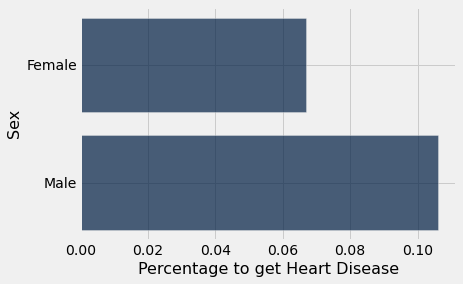

In [115]:
sex_percent.select("Sex","Percentage to get Heart Disease").barh("Sex")

# Sex Column Permutation Test

In [13]:
sex_observed_difference = difference_of_means(sex_binary,'Female',"HeartDisease")
sex_observed_difference

-0.12502383784458382

In [14]:
sex_differences = make_array()

for i in np.arange(100):
    new_difference = one_simulated_difference(sex_binary,'Female', 'HeartDisease')
    sex_differences = np.append(sex_differences, new_difference)

Female Observed Difference: -0.12502383784458382


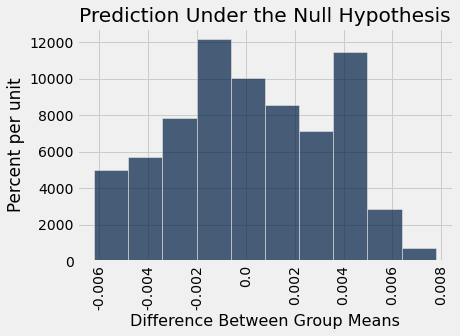

In [16]:
Table().with_column('Difference Between Group Means', sex_differences).hist()
print('Female Observed Difference:', sex_observed_difference)
plots.title('Prediction Under the Null Hypothesis');

# SleepTime Column Analysis

In [62]:
heart_sleep = heart_disease.select("HeartDisease", "SleepTime")
heart_sleep_avg = heart_sleep.group("HeartDisease", np.average)
heart_sleep_avg

HeartDisease,SleepTime average
No,7.09342
Yes,7.13616


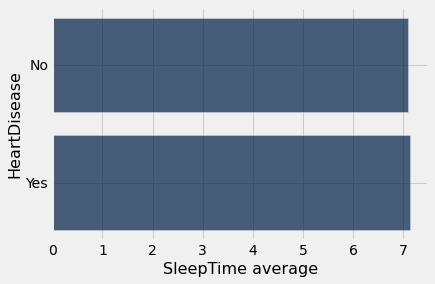

In [60]:
heart_sleep_avg.barh("HeartDisease")

#### Percentage of having heart disease when sleep is under 5 hours

In [78]:
sleep_binary = heart_sleep.with_column("Under_5_Hours", heart_sleep["SleepTime"] < 5)
sleep_binary_avg = sleep_binary.select("HeartDisease", "Under_5_Hours").group("HeartDisease", np.average)
sleep_binary_avg

HeartDisease,Under_5_Hours average
No,0.0320291
Yes,0.062653


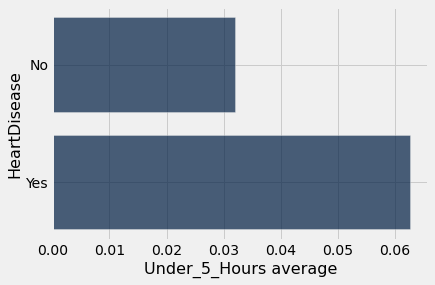

In [79]:
sleep_binary_avg.barh("HeartDisease")

# Sleep Pivot Table Analysis

In [116]:
sleep_pivot = heart_disease.pivot("HeartDisease", "SleepTime")

In [117]:
sleep_pivot

SleepTime,No,Yes
1,491,60
2,660,128
3,1645,347
4,6570,1180
5,17154,2030
6,61294,5427
7,91426,6325
8,89244,8358
9,14345,1696
10,6631,1165


In [118]:
sleep_percent = sleep_pivot.with_column("Percentage to get Heart Disease", 
                                      sleep_pivot["Yes"] / (sleep_pivot["Yes"] + sleep_pivot["No"]))

In [123]:
sleep_percent

SleepTime,No,Yes,Percentage to get Heart Disease
1,491,60,0.108893
2,660,128,0.162437
3,1645,347,0.174197
4,6570,1180,0.152258
5,17154,2030,0.105817
6,61294,5427,0.0813387
7,91426,6325,0.0647052
8,89244,8358,0.0856335
9,14345,1696,0.105729
10,6631,1165,0.149436


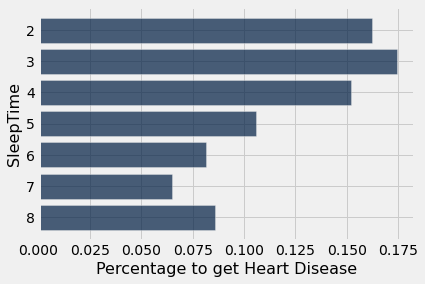

In [129]:
sleep_percent.select("SleepTime", "Percentage to get Heart Disease").take(1,2,3,4,5,6,7).barh("SleepTime")

# Sleep Column Permutation Test

In [66]:
sleep_observed_difference = difference_of_means(heart_sleep,'SleepTime',"HeartDisease")
sleep_observed_difference

0.04273970217475842

In [67]:
sleep_differences = make_array()

for i in np.arange(100):
    new_difference = one_simulated_difference(heart_sleep,'SleepTime', 'HeartDisease')
    sleep_differences = np.append(sleep_differences, new_difference)

Sleep Time Observed Difference: 0.04273970217475842


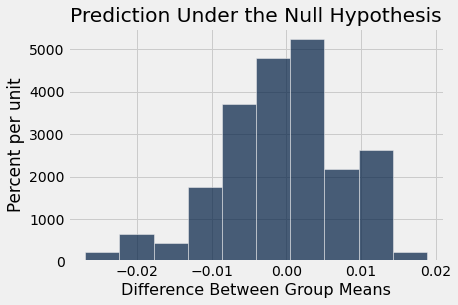

In [68]:
Table().with_column('Difference Between Group Means', sleep_differences).hist()
print('Sleep Time Observed Difference:', sleep_observed_difference)
plots.title('Prediction Under the Null Hypothesis');

# GenHealth Column and Pivot Table Analysis

In [130]:
genHealth_pivot = heart_disease.pivot("HeartDisease", "GenHealth")

In [132]:
genHealth_pivot

GenHealth,No,Yes
Excellent,65342,1500
Fair,27593,7084
Good,83571,9558
Poor,7439,3850
Very good,108477,5381


In [133]:
genHealth_percent = genHealth_pivot.with_column("Percentage to get Heart Disease", 
                                      genHealth_pivot["Yes"] / (genHealth_pivot["Yes"] + genHealth_pivot["No"]))

In [134]:
genHealth_percent

GenHealth,No,Yes,Percentage to get Heart Disease
Excellent,65342,1500,0.022441
Fair,27593,7084,0.204285
Good,83571,9558,0.102632
Poor,7439,3850,0.34104
Very good,108477,5381,0.0472606


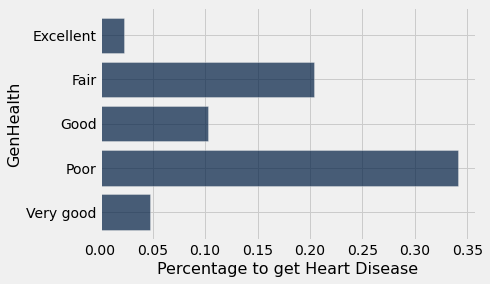

In [136]:
genHealth_percent.select("GenHealth", "Percentage to get Heart Disease").barh("GenHealth")

# GenHealth Column Permutation Test

In [182]:
gen_health = heart_disease.select("HeartDisease","GenHealth")

In [183]:
gen_health_poor = gen_health.with_column("PoorGenHealth", gen_health["GenHealth"] == "Poor")

In [184]:
genHealth_observed_difference = difference_of_means(gen_health_poor,'PoorGenHealth',"HeartDisease")
genHealth_observed_difference

0.11521028273645519

In [10]:
genHealth_differences = make_array()

for i in np.arange(100):
    new_difference = one_simulated_difference(gen_health_poor,'PoorGenHealth', 'HeartDisease')
    genHealth_differences = np.append(genHealth_differences, new_difference)

Generational Health Observed Difference: 0.11521028273645519


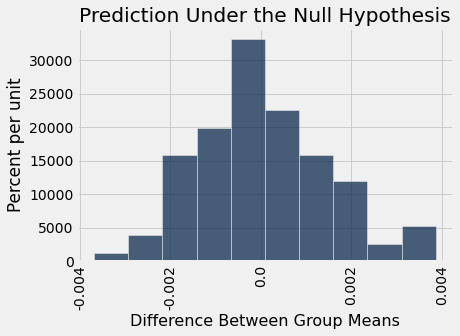

In [12]:
Table().with_column('Difference Between Group Means', genHealth_differences).hist()
print('Generational Health Observed Difference:', genHealth_observed_difference)
plots.title('Prediction Under the Null Hypothesis');

# Age Category Column Analysis

In [89]:
age_cat = heart_disease.select("HeartDisease", "AgeCategory")
age_cat_binary_65 = age_cat.with_column("65-69", age_cat["AgeCategory"] == "65-69")
age_cat_binary_70 = age_cat_binary_65.with_column("70-74", age_cat["AgeCategory"] == "70-74")
age_cat_binary_75 = age_cat_binary_70.with_column("75-79", age_cat["AgeCategory"] == "75-79")
age_cat_binary_80 = age_cat_binary_75.with_column("80 or older", age_cat["AgeCategory"] == "80 or older")

In [91]:
age_cat_combined = age_cat_binary_80.select("HeartDisease", "65-69",
                                            "70-74","75-79","80 or older")

In [98]:
age_cat_combined.where("HeartDisease", are.equal_to("Yes")).group("HeartDisease", np.average)

HeartDisease,65-69 average,70-74 average,75-79 average,80 or older average
Yes,0.149819,0.177072,0.147919,0.199065


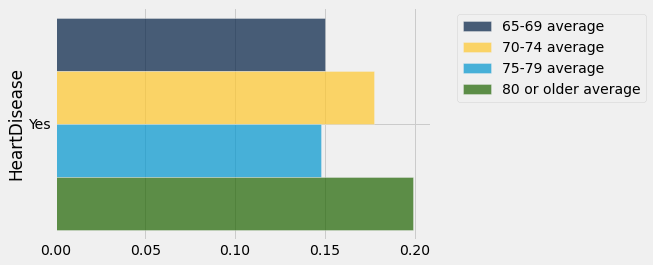

In [99]:
age_cat_combined.where("HeartDisease", are.equal_to("Yes")).group("HeartDisease", np.average).barh("HeartDisease")

# Age Category Pivot Table Analysis

In [139]:
ageCat_pivot = heart_disease.pivot("HeartDisease", "AgeCategory")

In [140]:
ageCat_pivot

AgeCategory,No,Yes
18-24,20934,130
25-29,16822,133
30-34,18527,226
35-39,20254,296
40-44,20520,486
45-49,21047,744
50-54,23999,1383
55-59,27555,2202
60-64,30359,3327
65-69,30050,4101


In [141]:
ageCat_percent = ageCat_pivot.with_column("Percentage to get Heart Disease", 
                                      ageCat_pivot["Yes"] / (ageCat_pivot["Yes"] + ageCat_pivot["No"]))

In [144]:
ageCat_percent.show(13)

AgeCategory,No,Yes,Percentage to get Heart Disease
18-24,20934,130,0.00617167
25-29,16822,133,0.00784429
30-34,18527,226,0.0120514
35-39,20254,296,0.0144039
40-44,20520,486,0.0231362
45-49,21047,744,0.0341425
50-54,23999,1383,0.0544874
55-59,27555,2202,0.0739994
60-64,30359,3327,0.0987651
65-69,30050,4101,0.120084


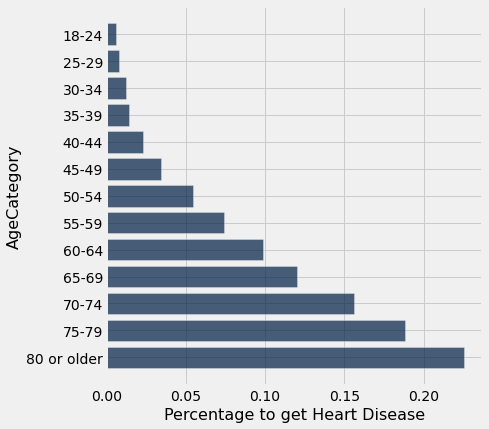

In [143]:
ageCat_percent.select("AgeCategory", "Percentage to get Heart Disease").barh("AgeCategory")

# Age Category Column Permutation Test

In [21]:
ageCat_observed_difference = difference_of_means(age_cat_binary_65,'65-69',"HeartDisease")
ageCat_observed_difference

0.04705671881650235

In [22]:
ageCat_differences = make_array()

for i in np.arange(100):
    new_difference = one_simulated_difference(age_cat_binary_65,'65-69', 'HeartDisease')
    ageCat_differences = np.append(ageCat_differences, new_difference)

Ages 65-69 Observed Difference: 0.04705671881650235


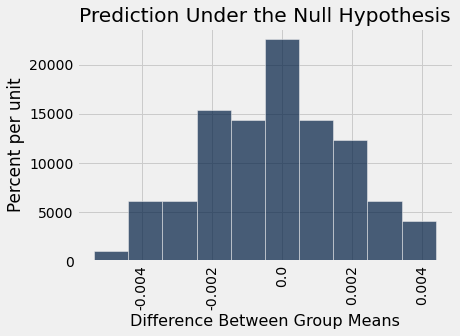

In [23]:
Table().with_column('Difference Between Group Means', ageCat_differences).hist()
print('Ages 65-69 Observed Difference:', ageCat_observed_difference)
plots.title('Prediction Under the Null Hypothesis');

# Race Column Analysis

In [15]:
race_pivot = heart_disease.pivot("HeartDisease", "Race")

In [16]:
race_pivot

Race,No,Yes
American Indian/Alaskan Native,4660,542
Asian,7802,266
Black,21210,1729
Hispanic,26003,1443
Other,10042,886
White,222705,22507


In [27]:
race_percent = race_pivot.with_column("Percentage to get Heart Disease", 
                                      race_pivot["Yes"] / (race_pivot["Yes"] + race_pivot["No"]))

In [28]:
race_percent

Race,No,Yes,Percentage to get Heart Disease
American Indian/Alaskan Native,4660,542,0.104191
Asian,7802,266,0.0329698
Black,21210,1729,0.0753738
Hispanic,26003,1443,0.052576
Other,10042,886,0.0810761
White,222705,22507,0.0917859


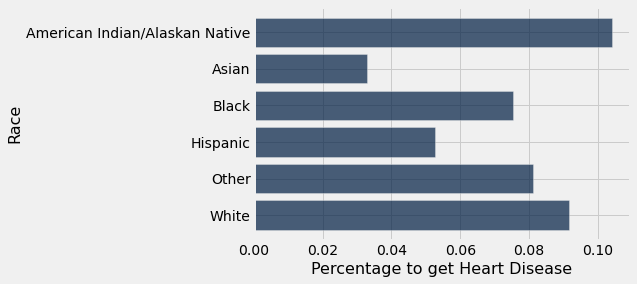

In [29]:
race_percent.select("Race", "Percentage to get Heart Disease").barh("Race")